##**Opik: LLM Evaluation and Monitoring**
it is an open-source platform developed by Comet to evaluate, test, and monitor Large Language Model (LLM) applications. It offers features such as tracing, evaluation, and production monitoring to enhance the performance and reliability of LLM-powered systems
Key Features:

Tracing: Track all LLM calls and traces during development and production.

Evaluation: Automate the evaluation process of your LLM application using datasets and experiments.

Production Monitoring: Log all production traces and review feedback scores, trace counts, and tokens over time.

##Set up Your Account
- [Comet](https://www.comet.com/site?from=llm&utm_source=opik&utm_medium=colab&utm_content=openai&utm_campaign=opik) provides a hosted version of the Opik platform, [simply create an account](https://www.comet.com/signup?from=llm&utm_source=opik&utm_medium=colab&utm_content=openai&utm_campaign=opik) and grab your API Key.
.

- Once your account is created, you can start logging traces by installing the Opik Python SDK:

###**Setup and Installation**



In [ ]:
%pip install --upgrade opik openai langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.7/458.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.4/644.4 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.70.0
    Uninstalling openai-1.70.0:
      Successfully uninstalled openai-1.70.0


###Configure Opik API Keys

In [ ]:
import opik

opik.configure(use_local=False)

OPIK: Your Opik API key is available in your account settings, can be found at https://www.comet.com/api/my/settings/ for Opik cloud


Please enter your Opik API key:··········
Do you want to use "shubhwithai" workspace? (Y/n)Y


OPIK: Configuration saved to file: /root/.opik.config


## **Preparing our environment**

In [ ]:
from google.colab import userdata
import os
import getpass

os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

###**Logging traces**

In order to log traces to Opik, we need to wrap our OpenAI calls with the `OpikTracer` function:

In [ ]:
import os
from langchain_openai import ChatOpenAI
from opik.integrations.langchain import OpikTracer

# Set your Opik project name
os.environ["OPIK_PROJECT_NAME"] = "openai-integration-demo"

# Create an Opik tracer for LangChain
opik_tracer = OpikTracer(tags=["chat_model"])

# Initialize ChatOpenAI with the Opik tracer as a callback
chat_model = ChatOpenAI(callbacks=[opik_tracer])

In [ ]:
import os
from langchain_openai import ChatOpenAI
from opik.integrations.langchain import OpikTracer
from langchain_core.messages import HumanMessage

# Define your prompt
prompt = "Write a short two sentence story about Opik."

# Use the LangChain way to create a message and invoke the model
messages = [HumanMessage(content=prompt)]
response = chat_model.invoke(messages)

# Print the response content
print(response.content)

OPIK: Started logging traces to the "openai-integration-demo" project at https://www.comet.com/opik/api/v1/session/redirect/projects/?trace_id=01963494-965f-7bb6-8dac-1e07d3a2d439&path=aHR0cHM6Ly93d3cuY29tZXQuY29tL29waWsvYXBpLw==.


Opik the hedgehog loved nothing more than curling up in his cozy burrow with a good book. But when the forest was threatened by a wildfire, he bravely rallied his animal friends to escape to safety together.


###The prompt and response messages are automatically logged to Opik and can be viewed in the UI.

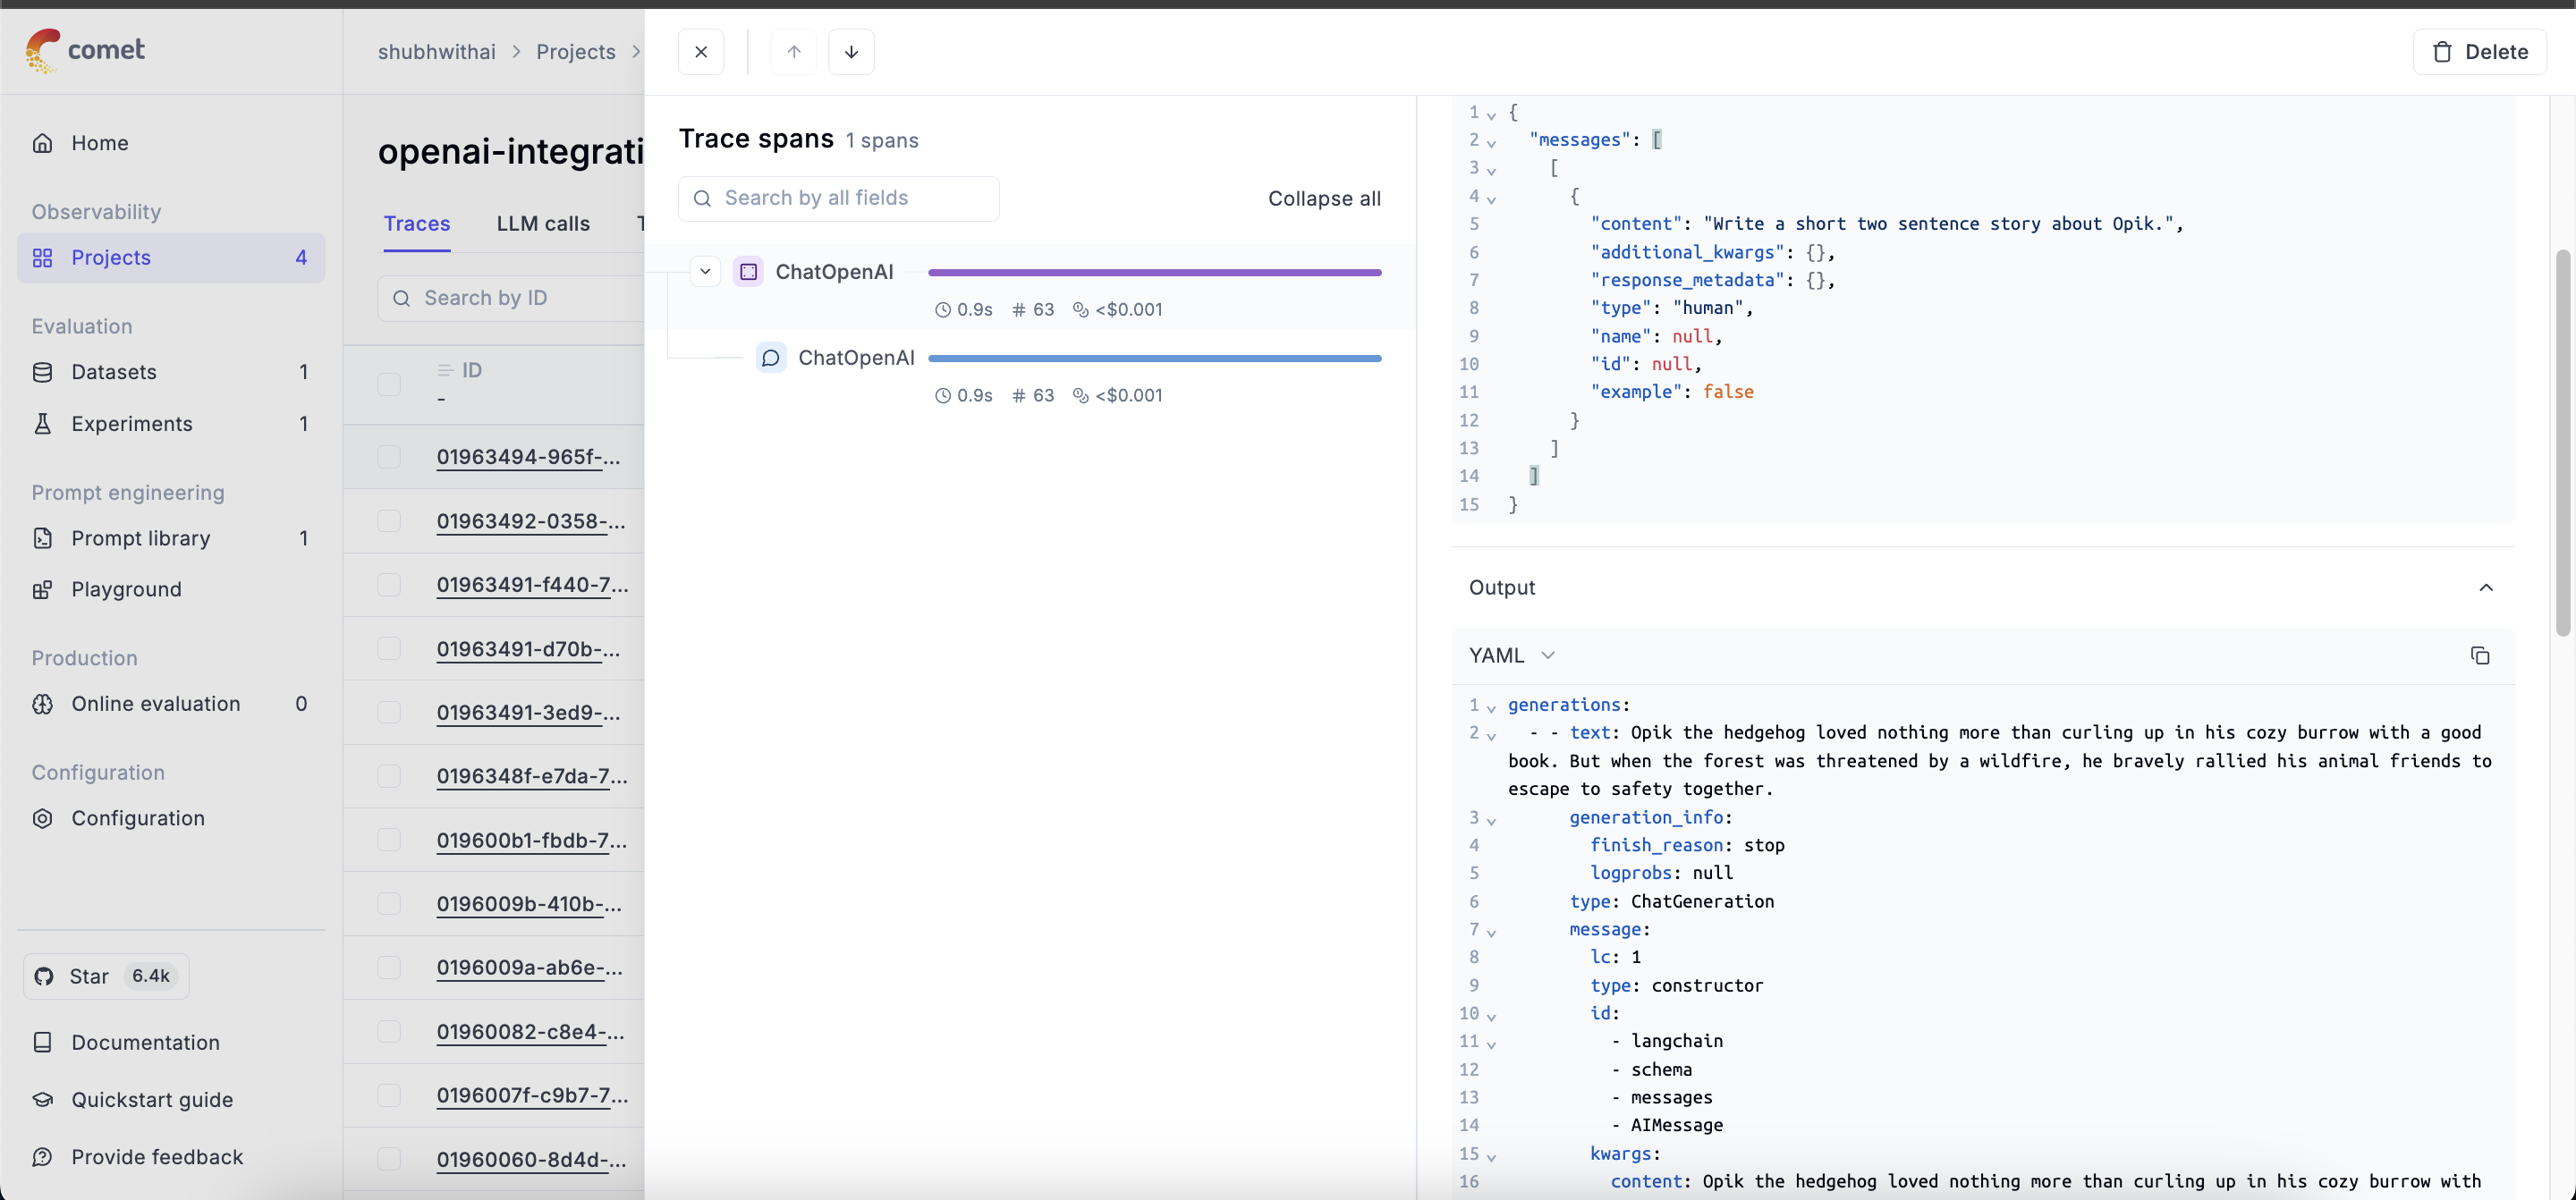

## Using it with the `track` decorator

If you have multiple steps in your LLM pipeline, you can use the `track` decorator to log the traces for each step. If OpenAI is called within one of these steps, the LLM call with be associated with that corresponding step:

In [ ]:
import os
from langchain_openai import ChatOpenAI
from opik import track
from opik.integrations.langchain import OpikTracer
from langchain_core.messages import HumanMessage

# Set your Opik project name
os.environ["OPIK_PROJECT_NAME"] = "openai-integration-demo"

# Create an Opik tracer for LangChain
opik_tracer = OpikTracer(tags=["chat_model"])

# Initialize ChatOpenAI with the Opik tracer as a callback
chat_model = ChatOpenAI(model="gpt-4o", callbacks=[opik_tracer])


@track
def generate_story(prompt):
    messages = [HumanMessage(content=prompt)]
    response = chat_model.invoke(messages)
    return response.content


@track
def generate_topic():
    prompt = "Generate a topic for a story about Opik."
    messages = [HumanMessage(content=prompt)]
    response = chat_model.invoke(messages)
    return response.content


@track
def generate_opik_story():
    topic = generate_topic()
    story = generate_story(topic)
    return story


# Call the function to generate a story
result = generate_opik_story()
print(result)

Title: "Opik and the Celestial Compass"

In the picturesque village of Polaris, where the night sky dances with constellations, young Opik is known for her insatiable curiosity. As an aspiring astronomer, she spends countless nights gazing through her telescope, mapping the universe and dreaming of the worlds beyond.

One fateful evening, while exploring the village's ancient observatory, Opik stumbles upon a hidden chamber. Within it, she discovers the Celestial Compass, a legendary artifact said to unlock the paths between stars. Intrigued by its intricate design and mysterious aura, Opik soon realizes she’s found something far more extraordinary than she ever anticipated.

The Compass, an artifact from a forgotten era, holds the power to align constellations and bridge the gaps between distant worlds. With each turn of its golden dials, the night sky reshapes, revealing secret routes through the cosmos. Eager to uncover the Compass’s secrets, Opik embarks on a cosmic journey, leavin

The trace can now be viewed in the UI:


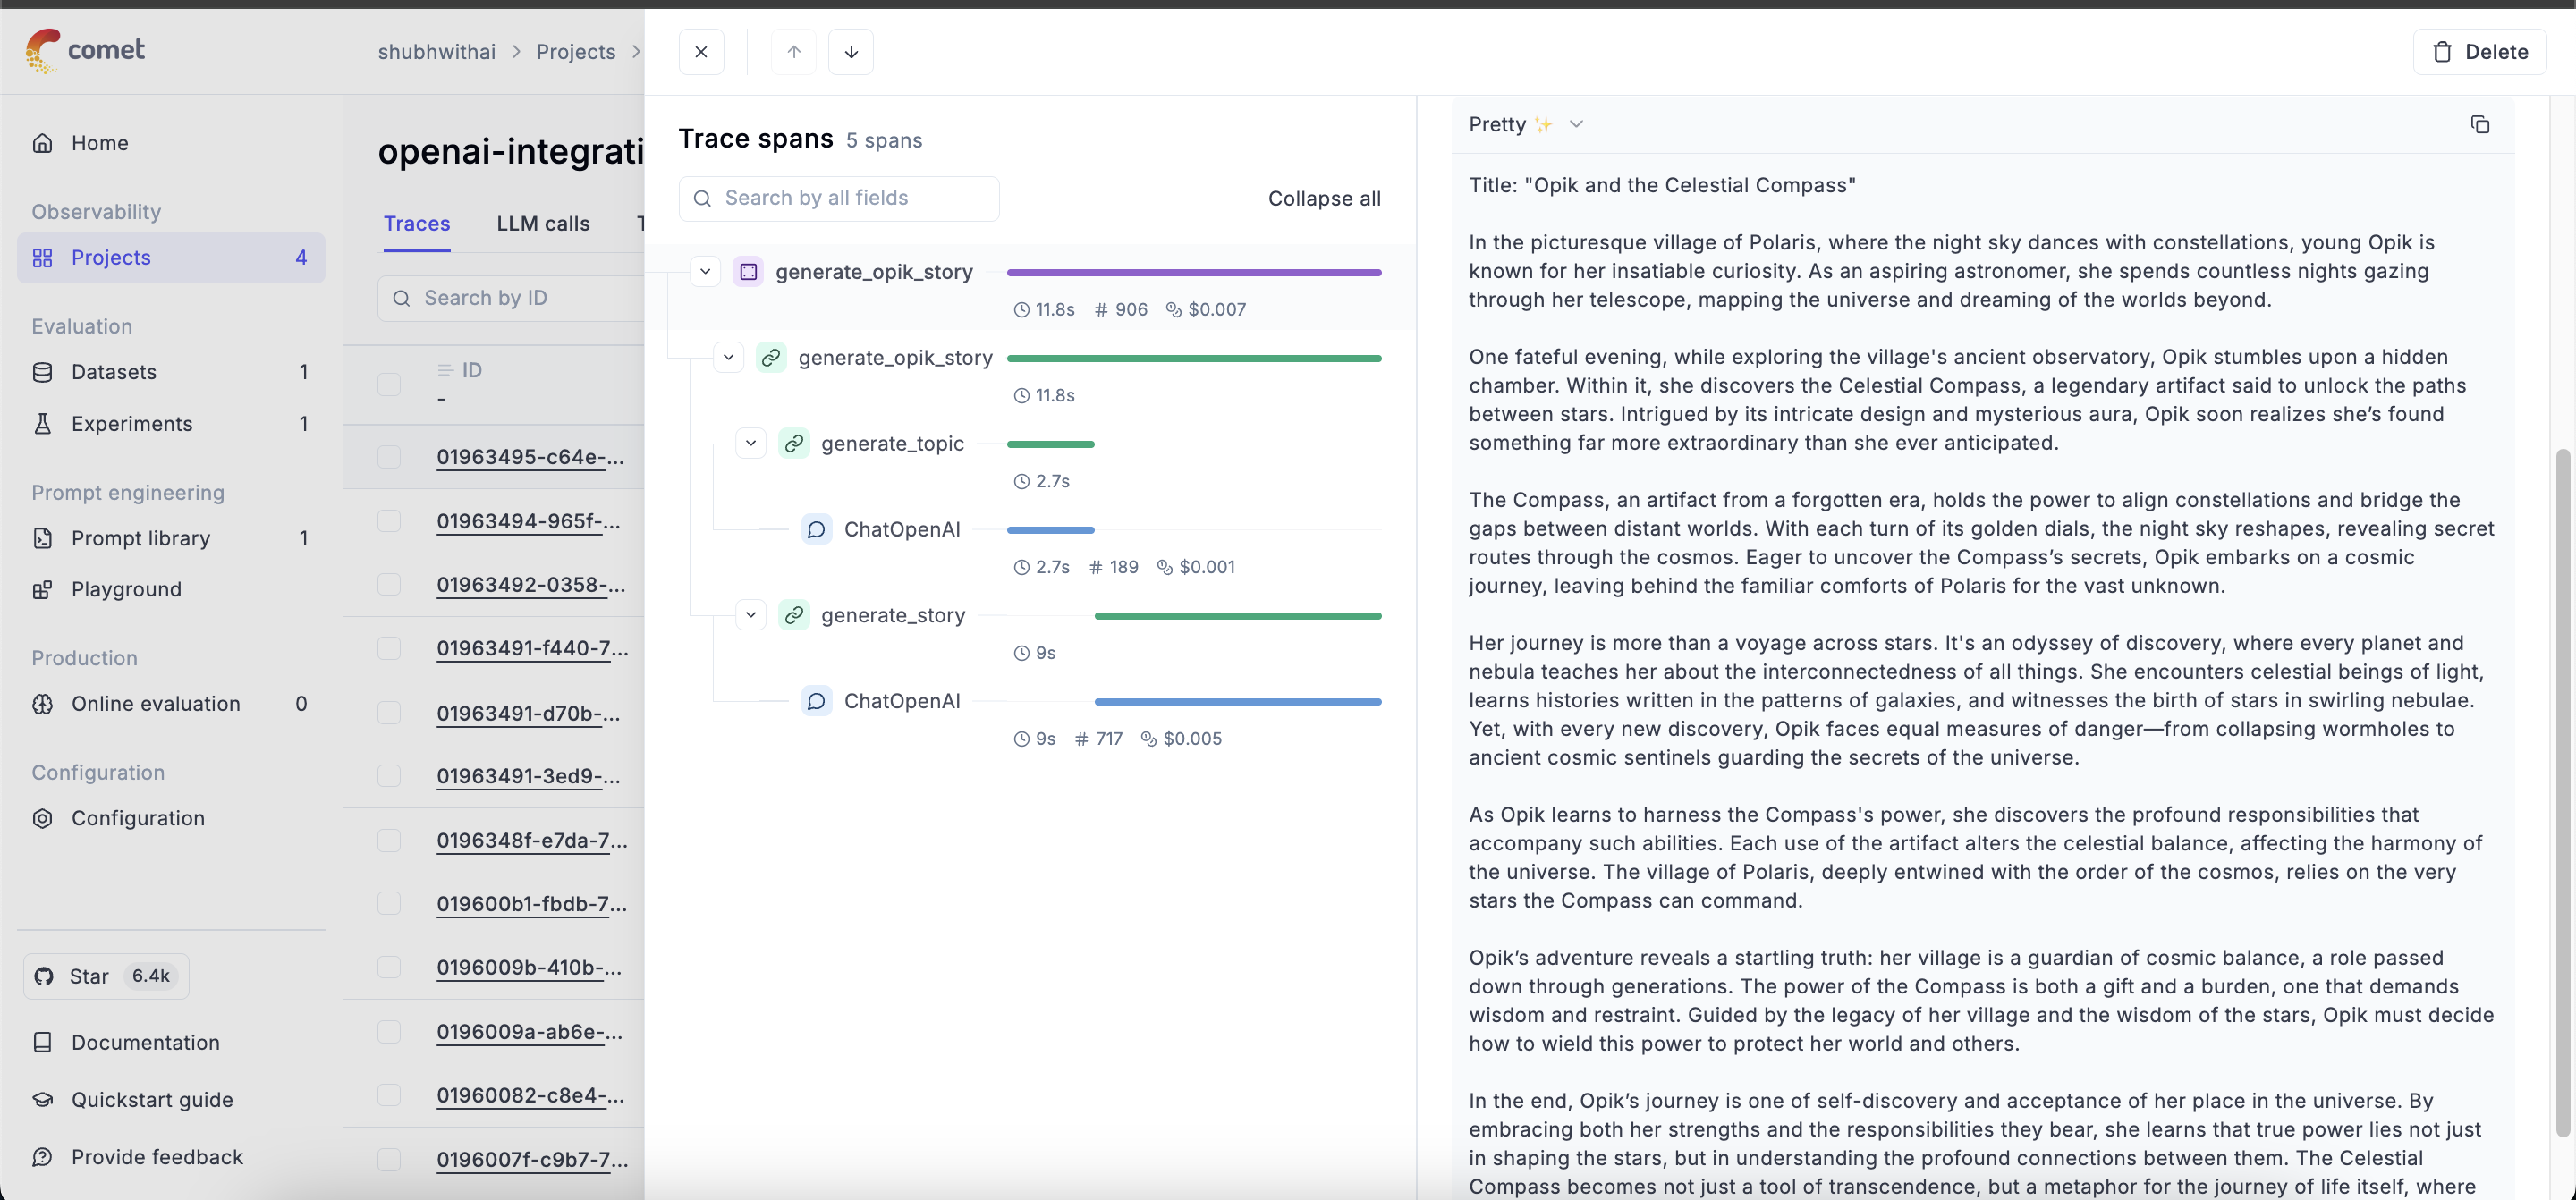

##**🧑‍⚖️ LLM as a Judge metrics**

The Python Opik SDK includes a number of LLM as a judge metrics to help you evaluate your LLM application.

In [ ]:
from opik.evaluation.metrics import Hallucination

metric = Hallucination()
score = metric.score(
    input="What is the capital of France?",
    output="Paris",
    context=["France is a country in Europe."]
)
print(score)

ScoreResult(name='hallucination_metric', value=0.0, reason='["The OUTPUT \'Paris\' does not introduce new information that isn\'t in the CONTEXT, but it doesn\'t need to. The task simply involves identifying the capital of France, a well-established fact.", "The CONTEXT does not provide information contradictory to the OUTPUT. It states France is a country in Europe, which aligns with the OUTPUT\'s focus on France.", \'The fact that Paris is the capital of France is a well-established and commonly known fact, in accordance with general knowledge.\', \'The OUTPUT is succinct and directly relevant to answering the anticipated question regarding the capital of France without errors or misattributions.\']', metadata=None, scoring_failed=False)


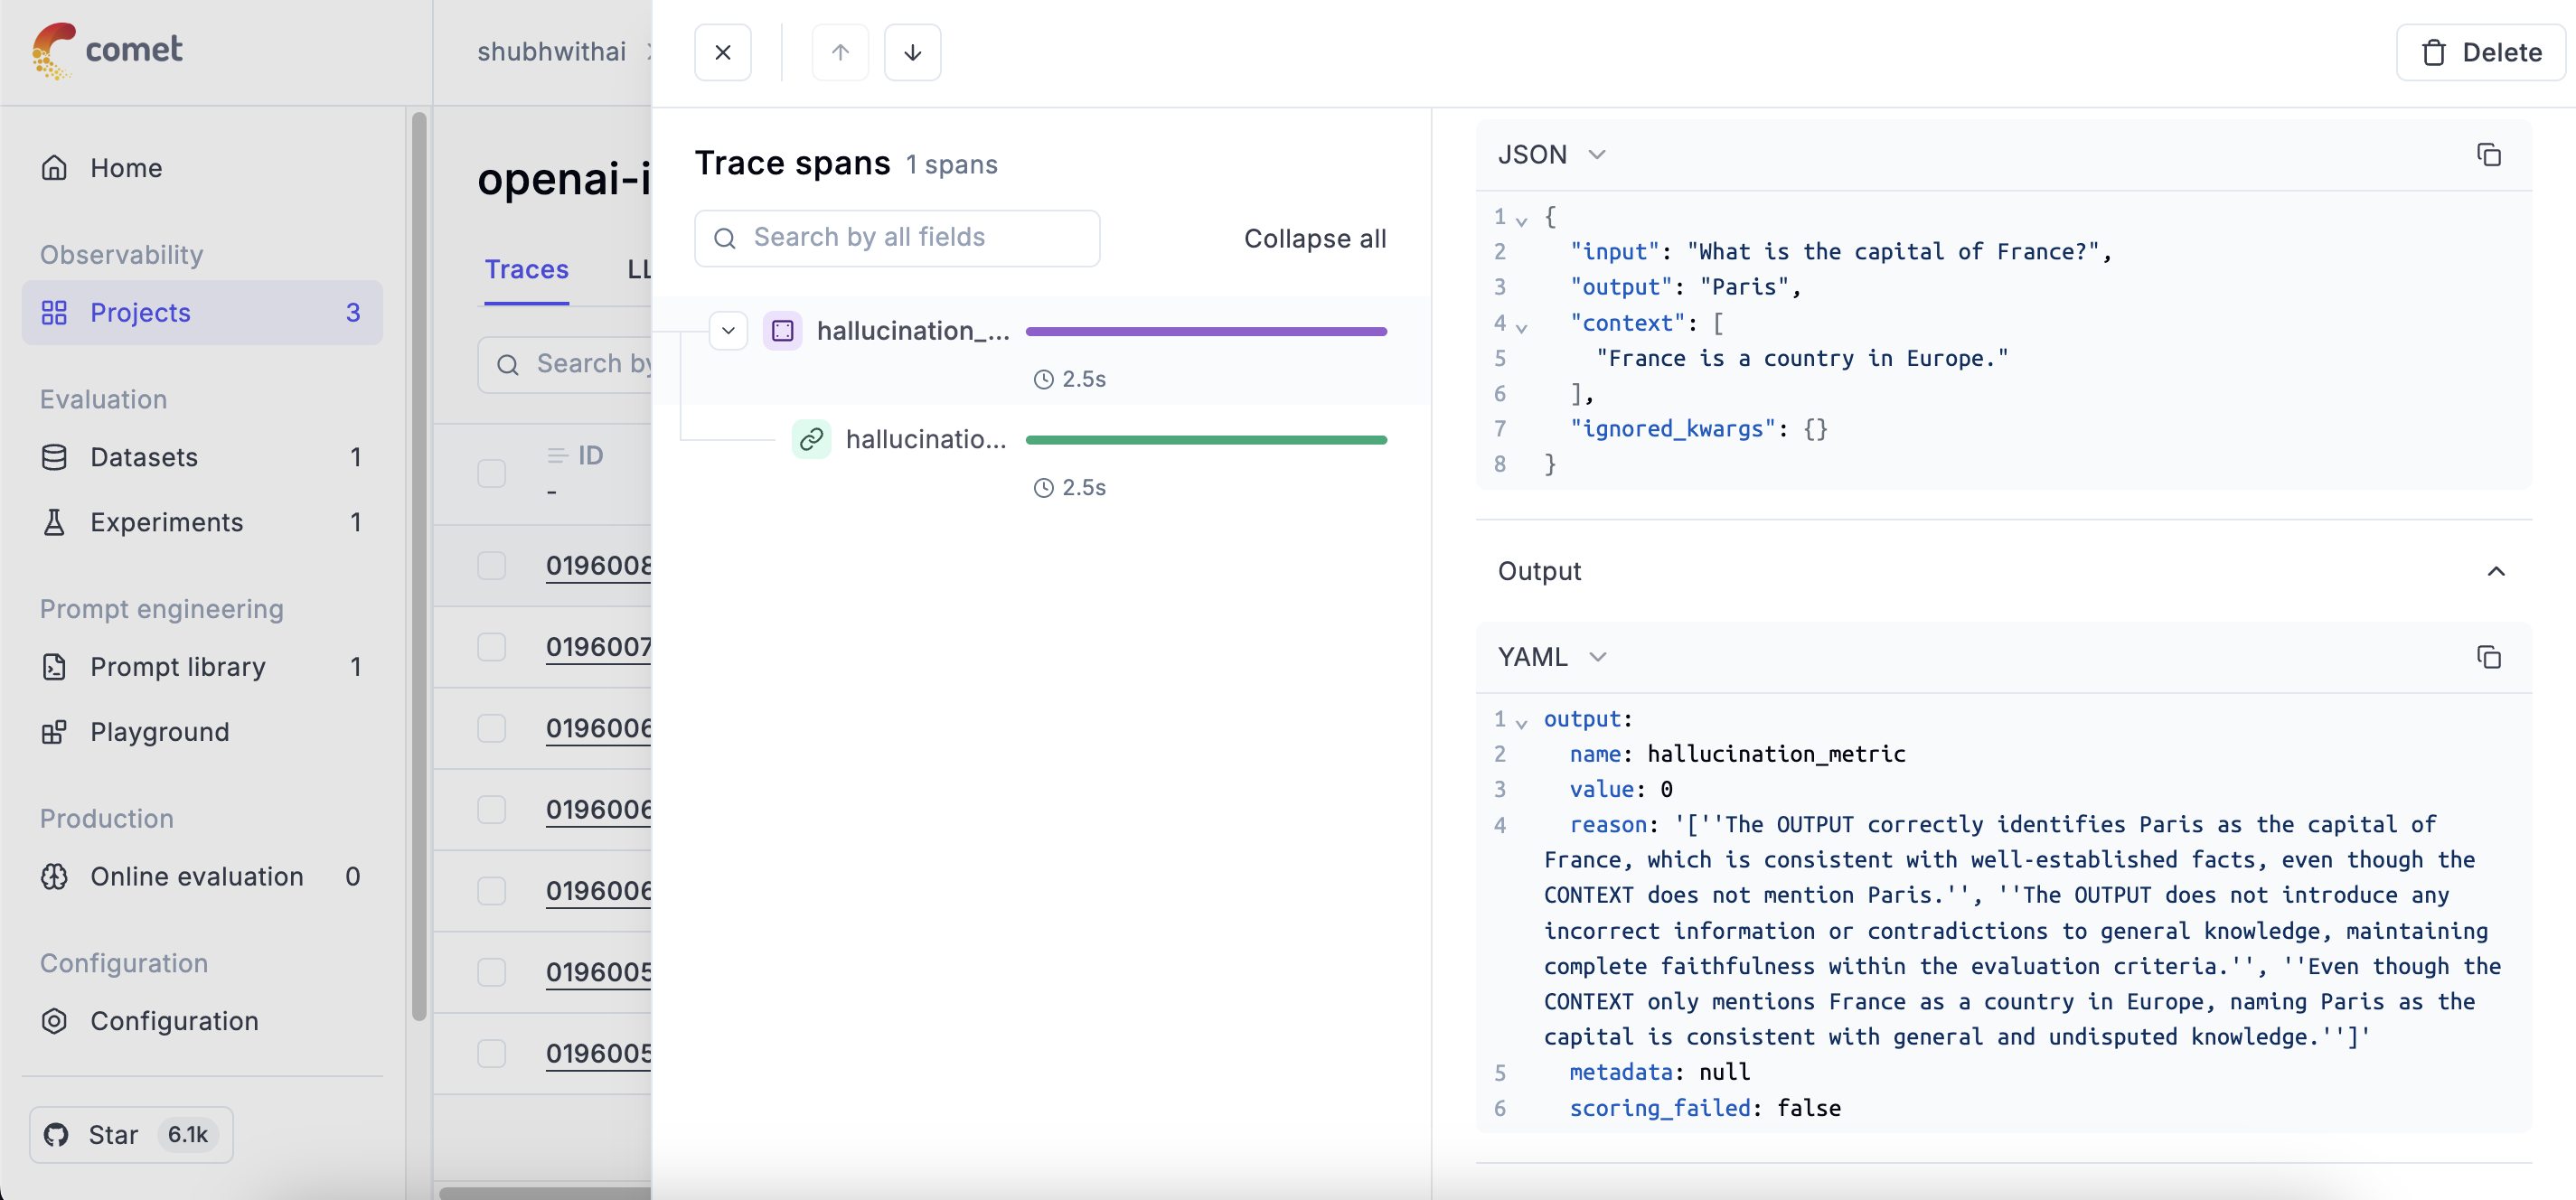

##**Answer Relevance**

The Answer Relevance metric allows you to evaluate how relevant and appropriate the LLM’s response is to the given input question or prompt. To assess the relevance of the answer, you will need to provide the LLM input (question or prompt) and the LLM output (generated answer). Unlike the Hallucination metric, the Answer Relevance metric focuses on the appropriateness and pertinence of the response rather than factual accuracy.



In [ ]:
from opik.evaluation.metrics import AnswerRelevance

metric = AnswerRelevance()

metric.score(
    input="What is the capital of France?",
    output="The capital of France is Paris. It is famous for its iconic Eiffel Tower and rich cultural heritage.",
    context=["France is a country in Western Europe. Its capital is Paris, which is known for landmarks like the Eiffel Tower."],
)

ScoreResult(name='answer_relevance_metric', value=0.95, reason="The answer directly and accurately identifies Paris as the capital of France, aligning perfectly with the user's query. Additionally, it provides relevant information about Paris's fame for the Eiffel Tower and its cultural heritage, which complements the context. The response is nearly flawless in relevance, with the extra details enhancing the richness of the answer without deviating from the question.", metadata=None, scoring_failed=False)

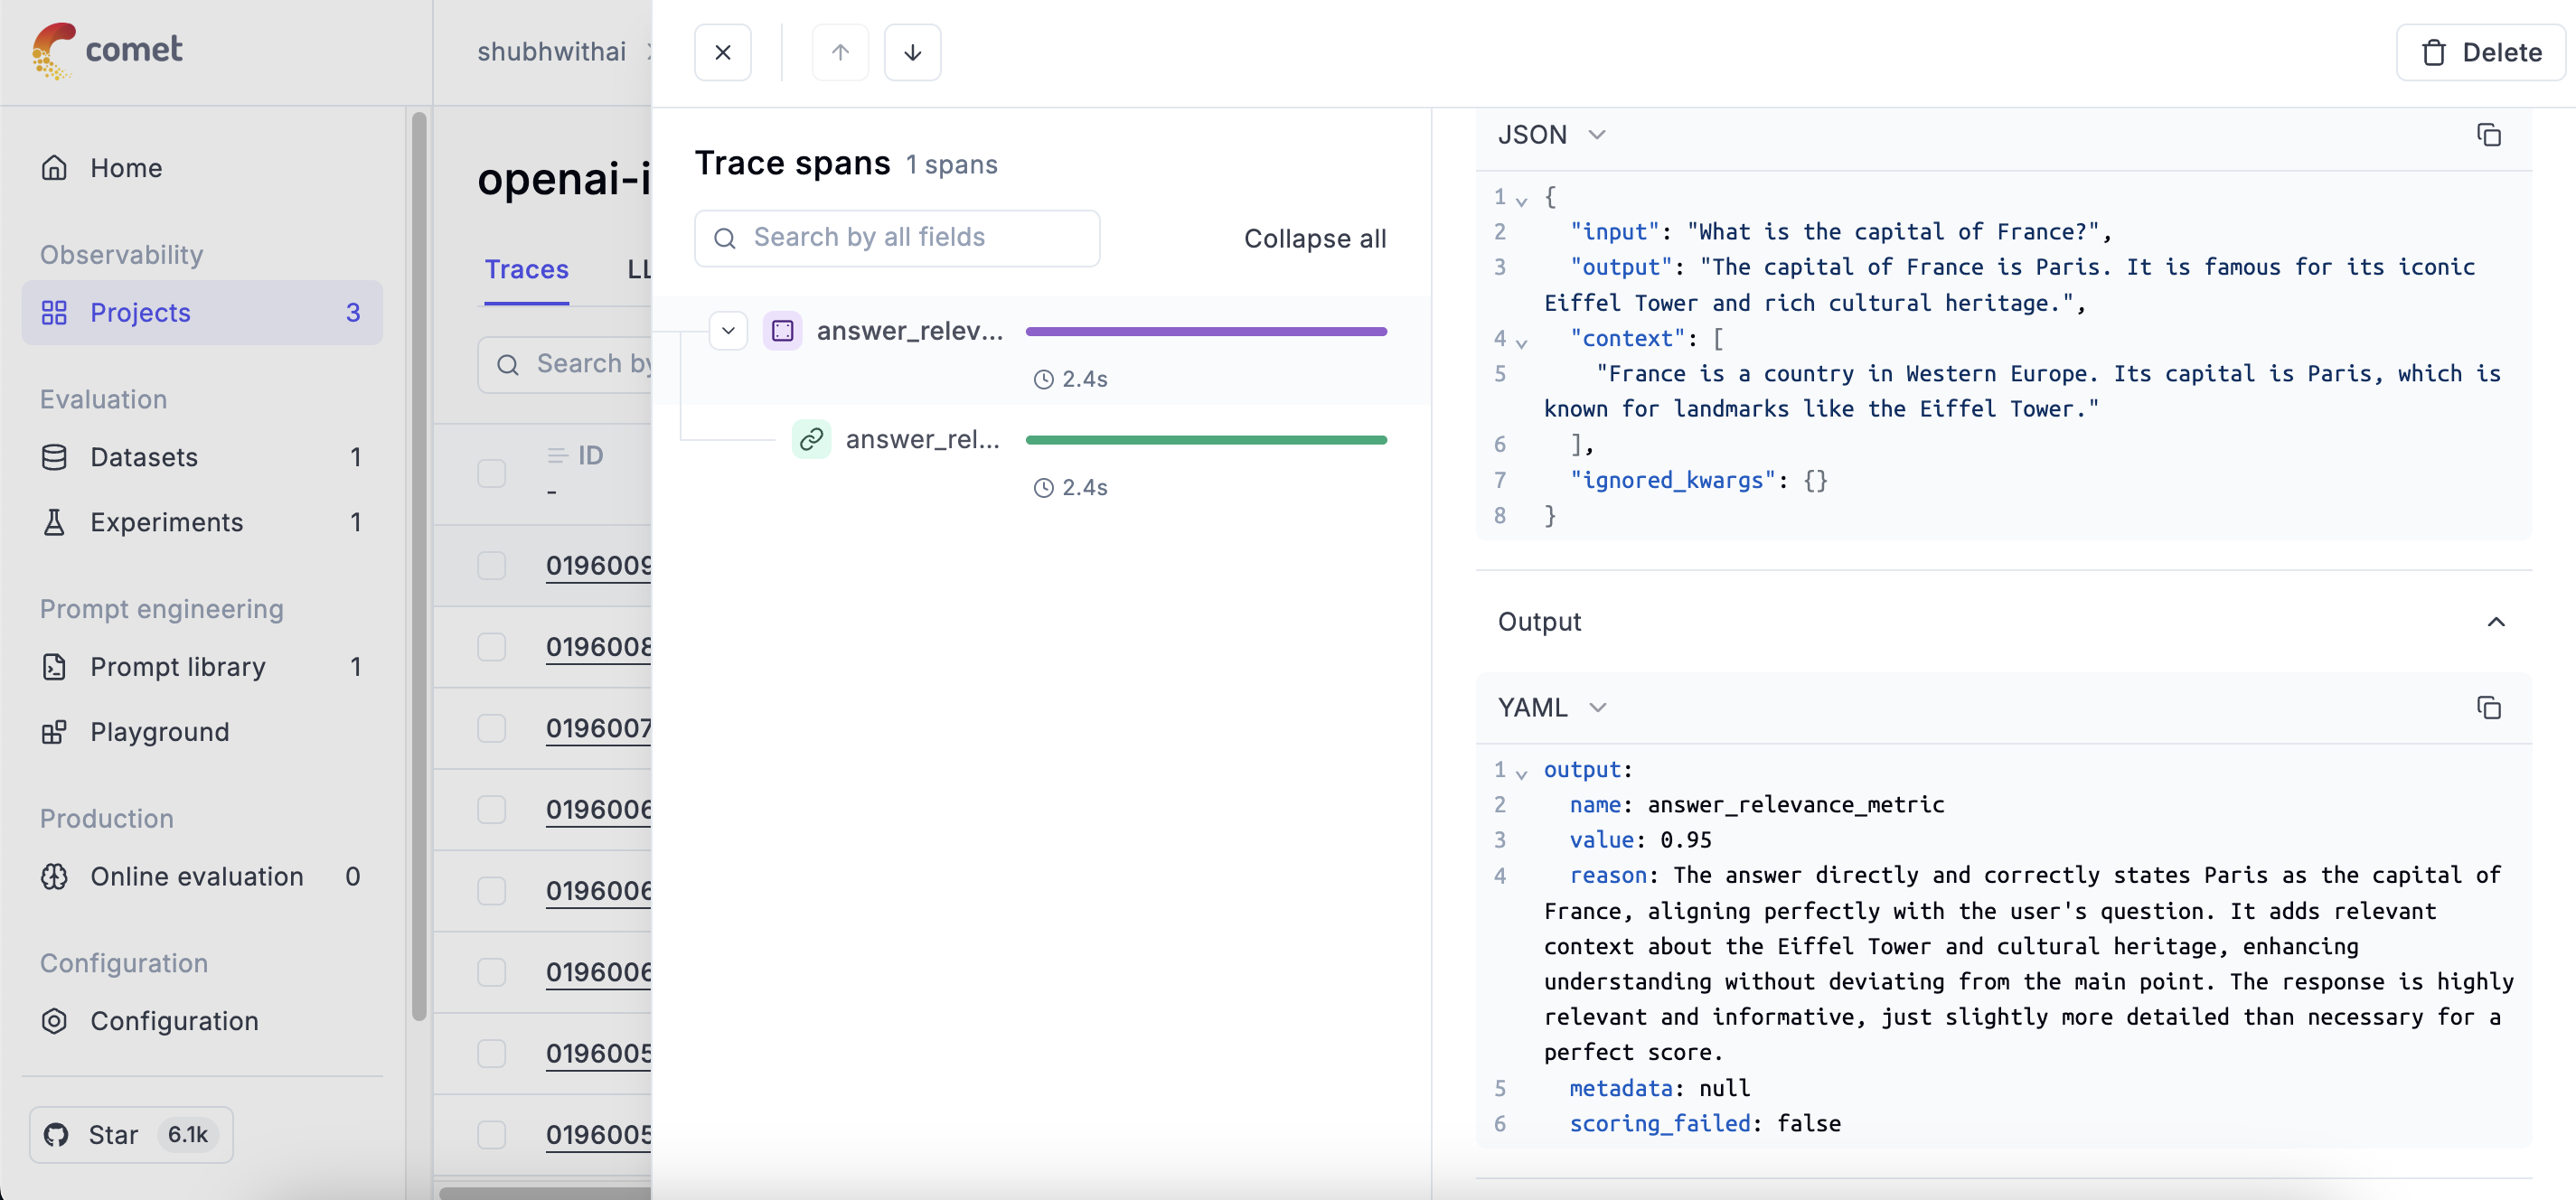

##**Context Precision**

The context precision metric evaluates the accuracy and relevance of an LLM’s response based on provided context, helping to identify potential hallucinations or misalignments with the given information.

In [ ]:
from opik.evaluation.metrics import ContextPrecision

metric = ContextPrecision()

metric.score(
    input="What is the capital of France?",
    output="The capital of France is Paris. It is famous for its iconic Eiffel Tower and rich cultural heritage.",
    expected_output="Paris",
    context=["France is a country in Western Europe. Its capital is Paris, which is known for landmarks like the Eiffel Tower."],
)

ScoreResult(name='context_precision_metric', value=1.0, reason='The answer provided matches the expected output by accurately identifying Paris as the capital of France. Additionally, it aligns well with the context by referencing the Eiffel Tower and cultural heritage, reflecting a complete understanding of the context and user query.', metadata=None, scoring_failed=False)

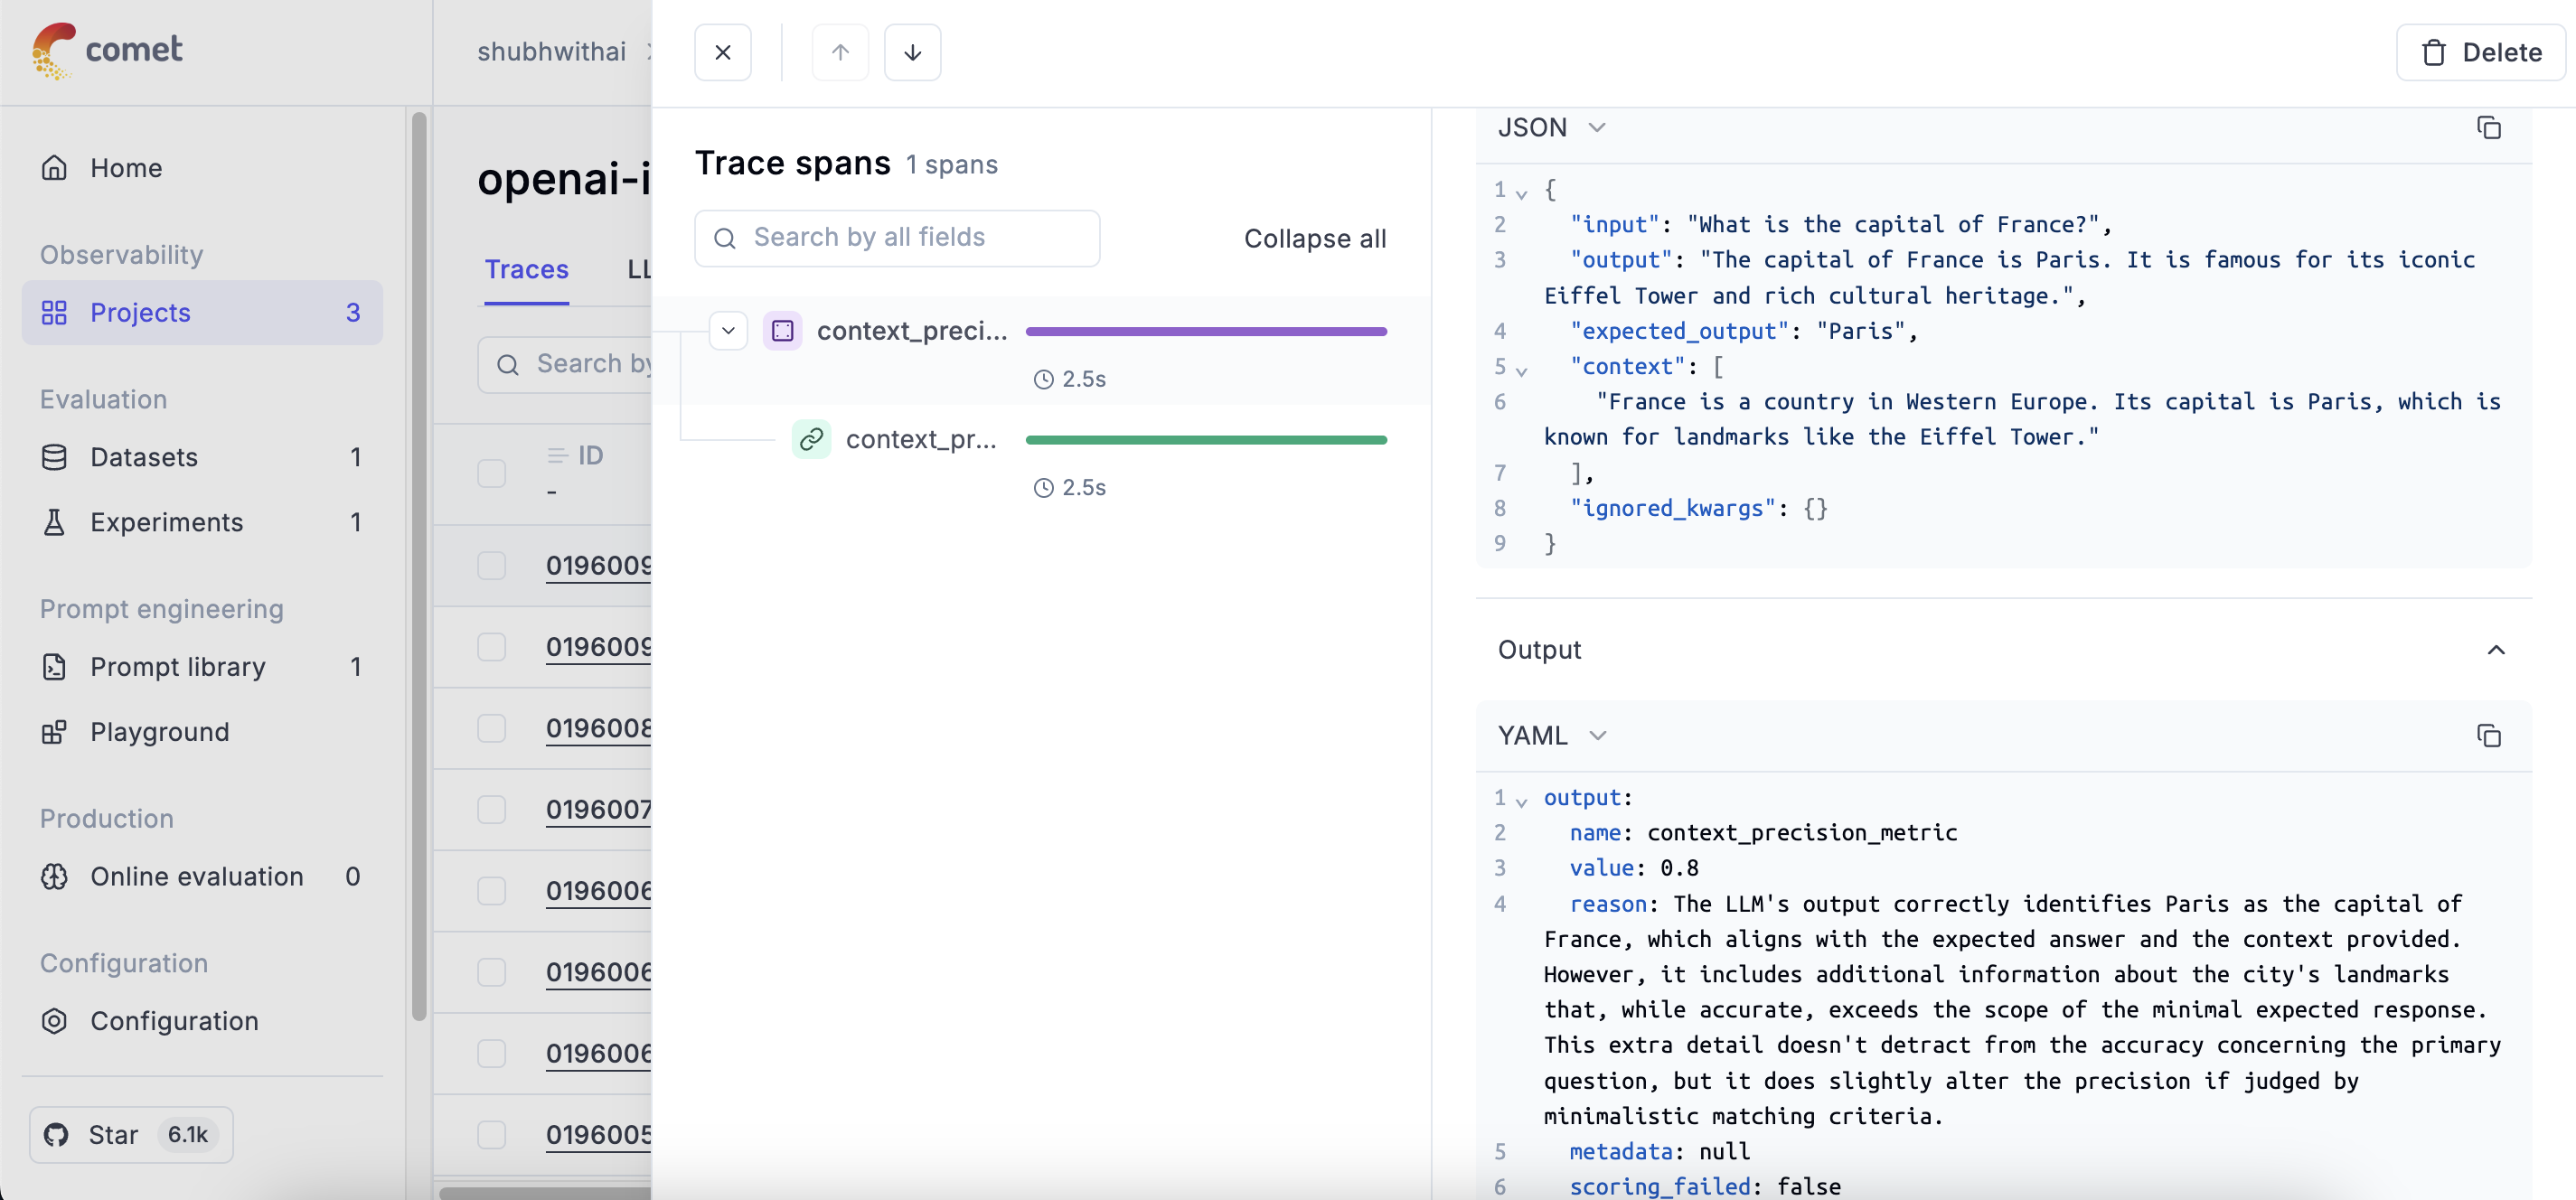